# Casusopdracht - Onderzoeksvraag 1

*Klas*: V2B
*Studenten*: 
- Roan Gaasbeek
- Luc Pikaar
- Mathijs de Jong


Dit bestand bouwt voort op de algemene stappen die zijn uitgevoerd in het bestand `CM_casusopdracht.ipynb`. In dat bestand zijn de fasen **Business Understanding**, **Data Understanding** en **Algemene Data Preparation** behandeld. In dit bestand gaan we verder met **Data Preparation** specifiek voor deze onderzoeksvraag en starten we de **Modelling**-fase.



### Onderzoeksvraag
In hoeverre is de bruto-omzet van een film te voorspellen op basis van de populariteit op **Facebook** en **IMDB**?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler



In [2]:
# De schone dataset inladen
dataset = pd.read_csv('films.csv')


## 2. Data understanding

### Features
In dit deel van het onderzoek richten we ons op de volgende kenmerken (features) die van invloed kunnen zijn op de bruto-omzet van een film.

**Film_likes**: Het aantal facebook likes dat de film heeft. Deze feature geeft een indicatie van de populariteit van de film op sociale media, wat kan bijdragen aan meer zichtbaarheid en mogelijk een hogere bruto-omzet.

**Regisseur_likes**: Het aantal likes dat de regisseur heeft op facebook. Deze feature geeft een indicatie van de populariteit van de film op sociale media, wat kan bijdragen aan meer zichtbaarheid en mogelijk een hogere bruto-omzet.

**Acteur_1_likes**: Het aanta likes dat de hoofdrolspeler van de film heeft op facebook. Deze feature geeft een indicatie van de aantrekkingskracht van de hoofdrolspeler, wat een grote invloed kan hebben op de populariteit van de film en de bruto-omzet.

**Acteur_2_likes**: Het aantal likes dat de tweede belangrijkste acteur van de film heeft facebook. Deze feature geeft een indicatie van de populariteit van de film op sociale media, wat kan bijdragen aan meer zichtbaarheid en mogelijk een hogere bruto-omzet.

**Acteur_3_likes**: Het aantal likes dat de derde belangrijkste acteur van de film heeft op facebook. Deze feature geeft een indicatie van de populariteit van de film op sociale media, wat kan bijdragen aan meer zichtbaarheid en mogelijk een hogere bruto-omzet.

**Cast_totaal_likes**: Het totale aantal likes facebook van de volledige cast. Deze feature geeft breed beeld van de populariteit van de cast, wat kan bijdragen aan meer zichtbaarheid en mogelijk een hogere bruto-omzet.

**IMDB-score**: De gemiddelde beoordeling van de film door gebruikers op IMDB. Deze feature geeft een indicatie van de populariteit en kwaliteit van een film, zoals beoordeeld door het publiek.




## Correlation Analysis



### Scatterplot van Totale Likes versus Omzet

In deze analyse visualiseren we de relatie tussen het totale aantal likes en de omzet (in USD) van films. Het doel is om te onderzoeken of er een correlatie bestaat tussen de populariteit van een film op sociale media en de bruto-omzet.

We maken gebruik van een scatterplot om deze twee variabelen te plotten. Elke datapunt in de scatterplot vertegenwoordigt een film, waarbij de x-as het totale aantal likes en de y-as de omzet in USD weergeeft. Daarnaast berekenen we de correlatiecoëfficiënt om de sterkte van de lineaire relatie tussen de twee variabelen te bepalen.

Een positieve correlatie zou erop wijzen dat films met meer likes meestal een hogere omzet genereren, terwijl een zwakke correlatie zou aangeven dat sociale media populariteit geen goede voorspeller is.


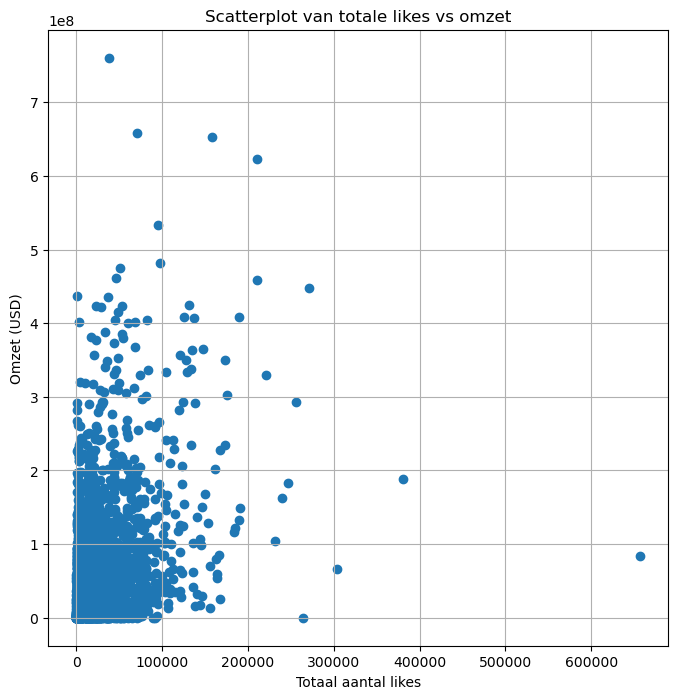

De correlatie is 0.3845780822899517


In [3]:
#Totaal aantal likes optellen
dataset['totaal_likes'] = dataset['cast_totaal_likes'] + dataset['film_likes']
#Plot wordt aangemaakt
plt.figure(figsize=(8, 8))
plt.scatter(dataset['totaal_likes'], dataset['omzet'])
plt.title('Scatterplot van totale likes vs omzet')
plt.xlabel('Totaal aantal likes')
plt.ylabel('Omzet (USD)')
plt.grid(True)
plt.show()
#Correlatie berekenen en printen
correlatie = np.corrcoef(dataset['totaal_likes'], dataset['omzet'])[0,1]
print(f"De correlatie is {correlatie}")

Hoewel de relatie niet heel sterk is, kunnen de likes nog een goede voorspellende waarde hebben, maar dan in combinatie met andere features. Als je puur naar het totale aantal likes kijkt, dan is er geen directie correlatie met de bruto-omzet.

### Budget

# Scatterplot van Budget versus Omzet

In deze analyse visualiseren we de relatie tussen het budget en de omzet (in USD) van films. Het doel is om te onderzoeken of er een correlatie bestaat tussen het budget en de bruto-omzet.

We maken gebruik van een scatterplot om deze twee variabelen te plotten. Elke datapunt in de scatterplot vertegenwoordigt een film, waarbij de x-as het budget en de y-as de omzet in USD weergeeft. Daarnaast berekenen we de correlatiecoëfficiënt om de sterkte van de lineaire relatie tussen de twee variabelen te bepalen.

Een sterke positieve correlatie zou erop wijzen dat een hoger budget meestal leidt tot een hogere omzet, terwijl een zwakke correlatie zou aangeven dat het budget geen directe voorspeller is voor de bruto-omzet van een film.



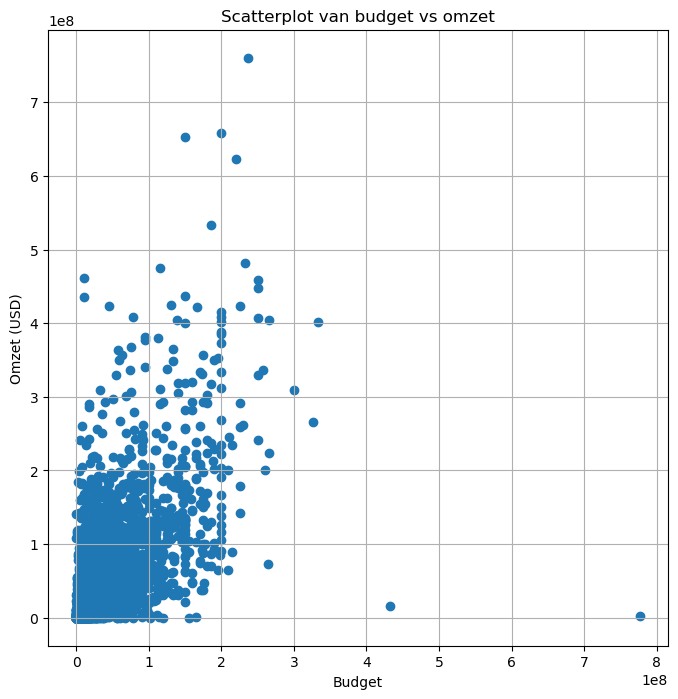

De correlatie is 0.6204341240303215


In [4]:
#Plot wordt gemaakt
plt.figure(figsize=(8, 8))
plt.scatter(dataset['budget'], dataset['omzet'])
plt.title('Scatterplot van budget vs omzet')
plt.xlabel('Budget')
plt.ylabel('Omzet (USD)')
plt.grid(True)
plt.show()

#Correlatie berekenen en printen
correlatie = np.corrcoef(dataset['budget'], dataset['omzet'])[0,1]
print(f"De correlatie is {correlatie}")

Er is een redelijke correlatie tussen het budget en de bruto-omzet van een film. Er zit wel veel spreiding in, dit betekent dat een hoog budget kan bijdragen aan een succesvolle film (met een hoog bruto-omzet) maar dat er geen garantie is.


### IMDB Score

# Scatterplot van IMDB-score versus Omzet

In deze analyse visualiseren we de relatie tussen de IMDB-score en de omzet (in USD) van films. Het doel is om te onderzoeken of er een correlatie bestaat tussen de IMDB-score en de bruto-omzet.

We maken gebruik van een scatterplot om deze twee variabelen te plotten. Elke datapunt in de scatterplot vertegenwoordigt een film, waarbij de x-as de IMDB-score en de y-as de omzet in USD weergeeft. Daarnaast berekenen we de correlatiecoëfficiënt om de sterkte van de lineaire relatie tussen de twee variabelen te bepalen.

Een sterke positieve correlatie zou erop wijzen dat een hogere IMDB-score meestal leidt tot een hogere omzet, terwijl een zwakke correlatie zou aangeven dat de IMDB-score geen directe voorspeller is voor de bruto-omzet van een film.



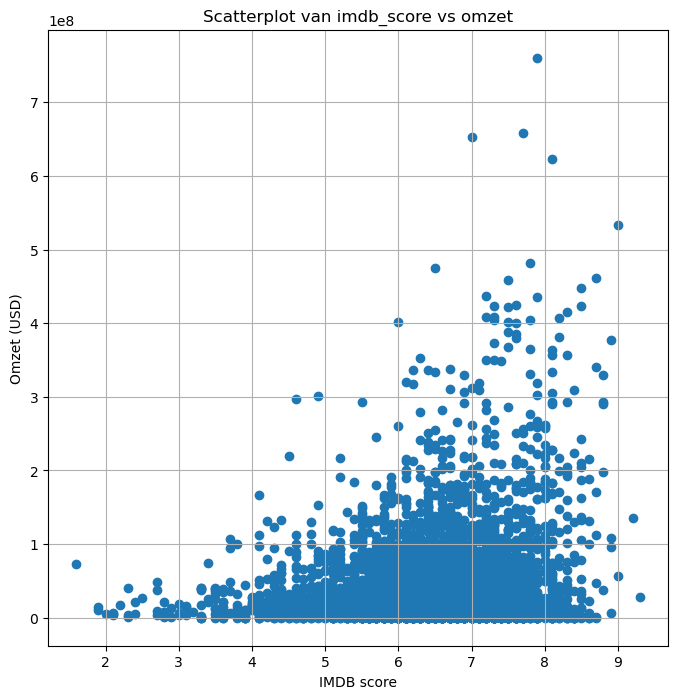

De correlatie is 0.21585758959866458


In [5]:
#Plot wordt gemaakt
plt.figure(figsize=(8, 8))
plt.scatter(dataset['imdb_score'], dataset['omzet'])
plt.title('Scatterplot van imdb_score vs omzet')
plt.xlabel('IMDB score')
plt.ylabel('Omzet (USD)')
plt.grid(True)
plt.show()

#Correlatie berekenen en printen
correlatie = np.corrcoef(dataset['imdb_score'], dataset['omzet'])[0,1]
print(f"De correlatie is {correlatie}")

In het scatterplot is te zien dat films met een hogere IMDB-score wel degelijk een hogere omzet hebben, maar dit betekent niet dat een film met een lagere IMDB-score geen hoge omzet kan hebben.

### Acteur 

Door films te herstructureren naar individuele film-acteur combinaties, kun je `acteur`-specifieke invloed op het succes van de film onderzoeken. Je kunt films clusteren op basis van de Facebook-likes van individuele acteurs en de bijbehorende filmomzet, en vervolgens patronen analyseren zoals welke acteurs de meeste invloed hebben op commerciële successen.

In [6]:
actor_dataset = dataset[['titel', 'acteur_1', 'acteur_2', 'acteur_3', 'acteur_1_likes', 'acteur_2_likes', 'acteur_3_likes', 'omzet']]

# Hervormen van DataFrame
actor_data = pd.DataFrame({
    'titel': actor_dataset['titel'].values.repeat(3),
    'acteur': actor_dataset[['acteur_1', 'acteur_2', 'acteur_3']].values.flatten(),
    'likes': actor_dataset[['acteur_1_likes', 'acteur_2_likes', 'acteur_3_likes']].values.flatten(),
    'omzet': actor_dataset['omzet'].values.repeat(3)
}).dropna()

actor_data.head()

,titel,acteur,likes,omzet
0,Avatar,CCH Pounder,1000.0,760505847.0
1,Avatar,Joel David Moore,936.0,760505847.0
2,Avatar,Wes Studi,855.0,760505847.0
3,Pirates of the Caribbean: At World's End,Johnny Depp,40000.0,309404152.0
4,Pirates of the Caribbean: At World's End,Orlando Bloom,5000.0,309404152.0


In [7]:
idx = actor_data.groupby('titel')['likes'].idxmax()

# Selecteer alleen de rijen met de meeste likes per film
actor_data = actor_data.loc[idx].reset_index(drop=True)
actor_data.head()

,titel,acteur,likes,omzet
0,10 Cloverfield Lane,Bradley Cooper,14000.0,71897215.0
1,10 Days in a Madhouse,Christopher Lambert,1000.0,14616.0
2,10 Things I Hate About You,Joseph Gordon-Levitt,23000.0,38176108.0
3,102 Dalmatians,Ioan Gruffudd,2000.0,66941559.0
4,10th & Wolf,Brian Dennehy,954.0,53481.0


### Scatterplot van Acteur populariteit vs Film omzet

In deze visualisatie wordt de populariteit van een acteur, gemeten in het aantal Facebook likes, vergeleken met de bruto-omzet. Elk punt in de scatterplot vertegenwoordigt een film, waarbij de x-as de populariteit van de acteur toont en de y-as de omzet van de film.

Omdat Facebook likes over een groot bereik variëren (van enkele tientallen tot miljoenen), wordt de x-as weergegeven op een logaritmische schaal. Dit helpt om zowel films met een laag aantal likes als films met een zeer hoog aantal likes beter te visualiseren. De labels op de x-as zijn vertaald naar eenvoudig leesbare eenheden zoals "1", "10", "100", "1k", "10k", "100k", en "1M".

Een sterke positieve correlatie zou erop wijzen dat een hoger aantal facebook likes meestal leidt tot een hogere omzet, terwijl een zwakke correlatie zou aangeven dat het aantal facebook likes van een acteur geen goede voorspeller is voor de bruto-omzet van een film.


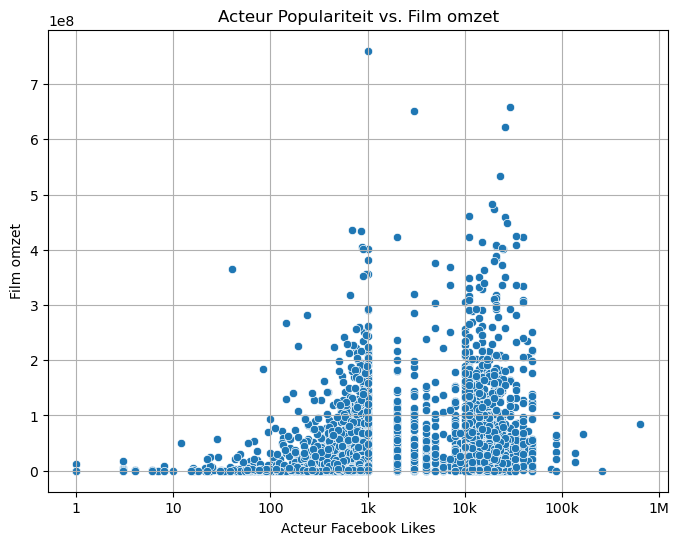

De correlatie is 0.2655103919266833


In [8]:
# Scatter plot: Likes vs Gross
plt.figure(figsize=(8, 6))

# Maak een nieuwe kolom met log10 van likes
actor_data['log_likes'] = np.log10(actor_data['likes'] + 1)  # +1 om log(0) te vermijden

# Scatterplot met log10 op de x-as
sns.scatterplot(x='log_likes', y='omzet', data=actor_data)

plt.title('Acteur Populariteit vs. Film omzet')
plt.xlabel('Acteur Facebook Likes')
plt.ylabel('Film omzet')
plt.grid(True)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["1", "10", "100", "1k", "10k", "100k", "1M"])  # Labels voor x-as
plt.show()

correlatie = np.corrcoef(actor_data['log_likes'], actor_data['omzet'])[0,1]
print(f"De correlatie is {correlatie}")


De populariteit van een acteur, gemeten in Facebook likes, heeft geen sterk voorspellende waarde voor de omzet van een film. Hoewel er enige patronen te zien zijn, zoals clusters van likes en omzet, is er geen duidelijk bewijs dat meer likes consistent leiden tot meer omzet.

## Train test split voor baseline en regressie model

In [9]:
# Hier kiezen we onze features en het target. Daarnaast splitsen we de training en validatie.

features = dataset[['imdb_score', 'film_likes', 'regisseur_likes', 
        'acteur_1_likes', 'acteur_2_likes', 
        'acteur_3_likes', 'cast_totaal_likes']]

target = dataset['omzet']
# De onafhankelijke variabelen en de afhankelijke variabele, random zorgt ervoor dat we de splitsing kunnen herhalen.
# We gebruiken 23% van de data voor de validatieset.
features_train, features_val, target_train, target_val = train_test_split(features, target, random_state=70, test_size=0.23)
print("Training set:", features_train.shape, target_train.shape)
print("Validatie set:", features_val.shape, target_val.shape)

# Normaliseren van de data
scaler = StandardScaler()

features_train_standardized = scaler.fit_transform(features_train)

features_val_standardized = scaler.transform(features_val)



Training set: (2909, 7) (2909,)
Validatie set: (870, 7) (870,)


### Baseline model

In [10]:
# In het baseline model berekenen we het gemiddelde uit van het target. We gebruiken een baseline model om te vergelijken met het
# supervised learning model.

gemiddelde_baseline = target_train.mean()

baseline_voorspelling = [gemiddelde_baseline] * len(target_val)

baseline_r2 = r2_score(target_val, baseline_voorspelling)
score = baseline_r2 * 100
print(f"R2 score: {score:.2f}%")

R2 score: -0.03%


Een score van -0.03% betekent dat het model slechter voorspelt dan het gemiddelde. Het baseline model is daarom geen goed model om de target variabele 'gross' te voorspellen. 

### Supervised learning model

We gebruiken als supervised learning model lineaire regressie. We hebben dit model gekozen, omdat wij alleen gebruik maken van numerieke variabelen. Daarnaast kunnen resultaten van lineaire regressie gemakkelijk worden geïnterpreteerd. 

In [11]:
# We gebruiken het lineaire regressie model en deze wordt getrained
model = LinearRegression()
model.fit(features_train, target_train)

target_pred = model.predict(features_val)
r2 = r2_score(target_val, target_pred)
score_percentage = r2 * 100

print(f"R2 score: {score_percentage:.2f}%")

R2 score: 29.10%


Wat betekent een R² score van 29% precies?
Een R² van 0.29 betekent dat het model slechts 29% van de variatie in de afhankelijke variabele in dit geval omzet verklaart. Dit betekent dat 71% van de variatie niet wordt verklaard door het model en door andere factoren komt. 

R² = 1 (100%) betekent dat het model perfect past en alle variatie in de data verklaart.
R² = 0 (0%) betekent dat het model helemaal geen verklaring biedt voor de variatie in de data. Dit is even 'slecht' als het gemiddelde.

In [12]:
#Hier berekenen we eerst MSE en daarna de wortel daarvan (de RMSE)
mse = ((target_pred - target_val) ** 2).mean()
rmse = np.sqrt(mse)
#Hier printen we de RMSE-score, hoe lager hoe beter de voorspellingen van het model.
print(f"RMSE score: {rmse}")

RMSE score: 57933639.969281204


De RMSE score is 57933639 dit betekent dat voorspelling van het model bijna 58 miljoen van de daadwerkelijke waarde af zit. Dit is een grote afwijking.

### Scatterplot van werkelijke waarde vs voorspelde waarde (Omzet)

In deze visualisatie wordt de werkelijke omzet van films vergeleken met de voorspelde omzet zoals berekend door het regressiemodel. Elk punt in de scatterplot vertegenwoordigt een film, waarbij de x-as de werkelijke omzet toont en de y-as de voorspelde omzet. 

Een diagonale rode lijn is toegevoegd om de perfecte voorspelling weer te geven. Als de voorspelde waarden perfect overeenkomen met de werkelijke waarden, zouden alle punten precies op deze rode lijn liggen.

Het doel van deze plot is om te beoordelen hoe goed het model in staat is om de omzet te voorspellen. Het zou het beste zijn als de punten dicht bij de rode diagonale lijn liggen, wat aangeeft dat de voorspellingen nauwkeurig zijn. Grote afwijkingen van deze lijn wijzen op een fout in de voorspelling.

Dit plot geeft een visuele indicatie van de prestaties van het model: 
- Hoe dichter de punten bij de rode lijn liggen, hoe beter het model presteert.
- Punten ver van de lijn geven aan dat het model moeite heeft om de omzet nauwkeurig te voorspellen.


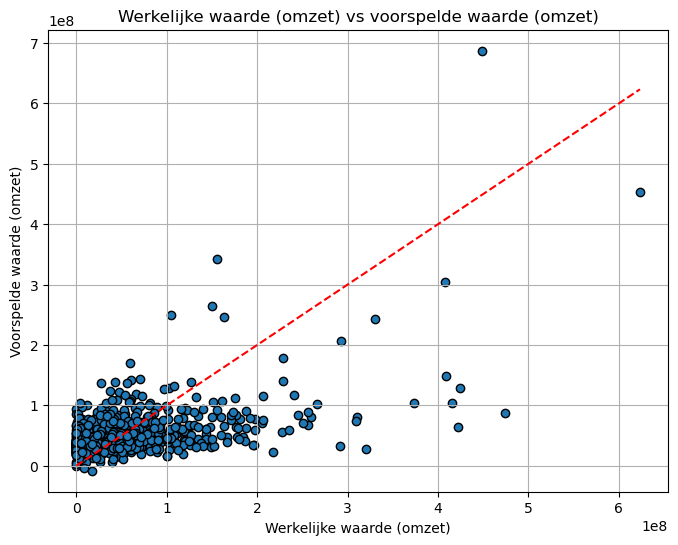

In [13]:
#Plot wordt gemaakt
plt.figure(figsize=(8,6))

plt.scatter(target_val, target_pred, edgecolor='k')

#Diagonale rode lijn die de perfecte voorspelling laat zien
plt.plot([target_val.min(), target_val.max()], [target_val.min(), target_val.max()], color='red', linestyle='--')

plt.title('Werkelijke waarde (omzet) vs voorspelde waarde (omzet)')
plt.xlabel('Werkelijke waarde (omzet)')
plt.ylabel('Voorspelde waarde (omzet)')
plt.grid(True)
plt.show()


De rode lijn in het plot is de perfect voorspelde waarde. In het plot kan je zien dat bij een lagere bruto inkomst het model beter werkt en naarmate de gross hoger wordt het steeds minder goed werkt.

# Conclusie

Het voorspellen van de omzet van films is een moeilijke taak die niet goed kan worden gemodelleerd met eenvoudige lineaire regressie, vooral vanwege de beperkte voorspellende kracht van de gebruikte features zoals budget, IMDB-score, en social media likes. Dit is vooral te zien aan de resultaten die wij uit ons onderzoek hebben gehaald. Bijvoorbeeld een R2 score van 29% en een RMSE van bijna 58 miljoen. Hieruit kunnen wij concluderen dat je de bruto-omzet niet goed kan voorspellen op basis van populariteit op Facebook en IMDB. Er zijn waarschijnlijk veel meer factoren van invloed op het succes van een film, zoals marketing, distributie, genre, en publiek, die niet zijn meegenomen in deze analyse. Een meer geavanceerd model en uitgebreide dataset met aanvullende factoren zouden mogelijk een beter inzicht kunnen bieden in welke elementen bijdragen aan het succes van een film.